In [6]:
import pandas as pd

In [7]:
train_data = pd.read_csv('train.csv')

In [8]:
test_data = pd.read_csv('test.csv', low_memory=False)

In [9]:
train_data = train_data.drop(columns=['Unnamed: 0', 'id'])

In [10]:
test_data = test_data.drop(columns='Unnamed: 0')

In [11]:
train_data = train_data.dropna()

# Data Exploration

In [12]:
train_data.shape

(404287, 5)

In [13]:
train_data.columns

Index(['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [14]:
train_data.head()

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404287 entries, 0 to 404289
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          404287 non-null  int64 
 1   qid2          404287 non-null  int64 
 2   question1     404287 non-null  object
 3   question2     404287 non-null  object
 4   is_duplicate  404287 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.5+ MB


In [16]:
test_data.shape

(3563475, 3)

In [17]:
test_data.columns

Index(['test_id', 'question1', 'question2'], dtype='object')

C:\Users\wkluc\AppData\Local\Temp\ipykernel_16996\497452276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data,x='is_duplicate', palette=['blue', 'orange'])


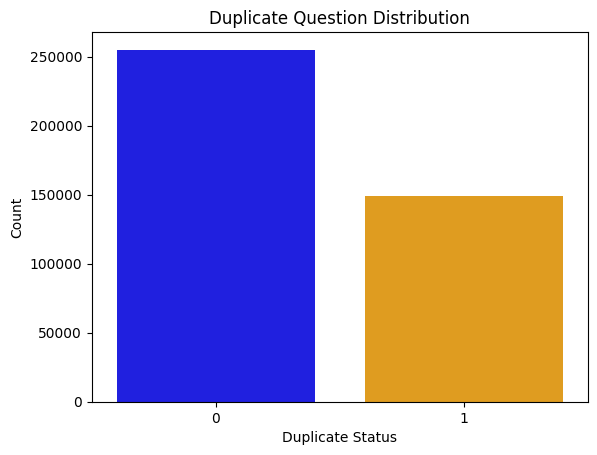

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=train_data,x='is_duplicate', palette=['blue', 'orange'])
plt.title("Duplicate Question Distribution")
plt.xlabel("Duplicate Status")
plt.ylabel("Count")
plt.show()

In [19]:
not_same = train_data['is_duplicate'].isin([0])
is_same = train_data['is_duplicate'].isin([1])

In [20]:
same_question = train_data[is_same]
same_question

,qid1,qid2,question1,question2,is_duplicate
5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...,...,...
404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


In [21]:
for i in range(0,100):
    if train_data.at[i, 'is_duplicate'] == 1:
        print(i, ':')
        print(same_question.at[i, 'question1'])
        print(same_question.at[i, 'question2'])

5 :
Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
7 :
How can I be a good geologist?
What should I do to be a great geologist?
11 :
How do I read and find my YouTube comments?
How can I see all my Youtube comments?
12 :
What can make Physics easy to learn?
How can you make physics easy to learn?
13 :
What was your first sexual experience like?
What was your first sexual experience?
15 :
What would a Trump presidency mean for current international master’s students on an F1 visa?
How will a Trump presidency affect the students presently in US or planning to study in US?
16 :
What does manipulation mean?
What does manipulation means?
18 :
Why are so many Quora users posting questions that are readily answered on Google?
Why do people ask Quora questions which can be answered easily by Google?
20 :
Why do rockets look white?
Why are rockets and boosters paint

In [22]:
diff_question = train_data[not_same]
diff_question

,qid1,qid2,question1,question2,is_duplicate
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...
404283,537924,537925,What do you think of the removal of the MagSaf...,What will the CPU upgrade to the 2016 Apple Ma...,0
404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404287,537928,537929,What is one coin?,What's this coin?,0
404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [23]:
for i in range(0,100):
    if train_data.at[i, 'is_duplicate'] == 0:
        print(i, ':')
        print(diff_question.at[i, 'question1'])
        print(diff_question.at[i, 'question2'])

0 :
What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
1 :
What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
2 :
How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?
3 :
Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?
4 :
Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?
6 :
Should I buy tiago?
What keeps childern active and far from phone and video games?
8 :
When do you use シ instead of し?
When do you use "&" instead of "and"?
9 :
Motorola (company): Can I hack my Charter Motorolla DCX3400?
How do I hack Motorola DCX3400 for free internet?
10 :
Method to find separation of slits using fresnel biprism?
What ar

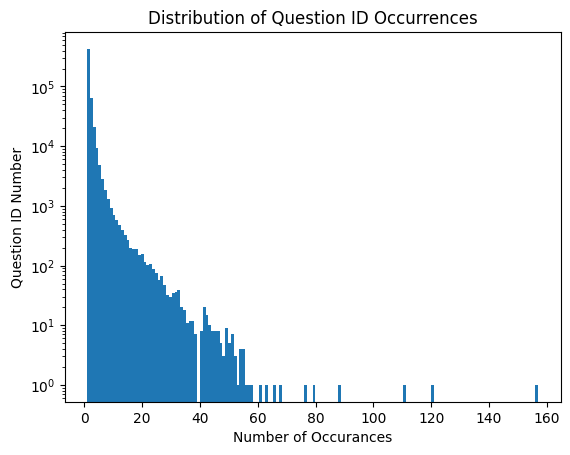

In [24]:

qid = pd.Series(train_data['qid1'].tolist() + train_data['qid2'].tolist())
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.title("Distribution of Question ID Occurrences")
plt.xlabel('Number of Occurances')
plt.ylabel('Question ID Number')
plt.show()

In [35]:
qid.value_counts().describe()

count    537929.000000
mean          1.503124
std           1.906524
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         157.000000
Name: count, dtype: float64

In [27]:
import numpy as np
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions repeated', x[x].shape[0])

Number of unique questions 537929
Number of questions repeated 111778


In [57]:
same_question = same_question.copy()
# Calculate lengths of question1 and question2 for each row
same_question['q1_length'] = same_question['question1'].str.len()
same_question['q2_length'] = same_question['question2'].str.len()

# Calculate the ratio (min length / max length)
same_question['length_ratio'] = same_question.apply(lambda row: min(row.loc['q1_length'], row.loc['q2_length']) / max(row.loc['q1_length'], row.loc['q2_length']), axis=1)
same_question['length_diff'] = same_question.apply(lambda row: max(row.loc['q1_length'], row.loc['q2_length']) - min(row.loc['q1_length'], row.loc['q2_length']), axis=1)


In [59]:
same_question['length_ratio'].describe()

count    149263.000000
mean          0.799306
std           0.155254
min           0.150000
25%           0.701754
50%           0.833333
75%           0.927273
max           1.000000
Name: length_ratio, dtype: float64

In [60]:
same_question['length_diff'].describe()

count    149263.000000
mean         13.142654
std          14.382100
min           0.000000
25%           3.000000
50%           9.000000
75%          17.000000
max         196.000000
Name: length_diff, dtype: float64

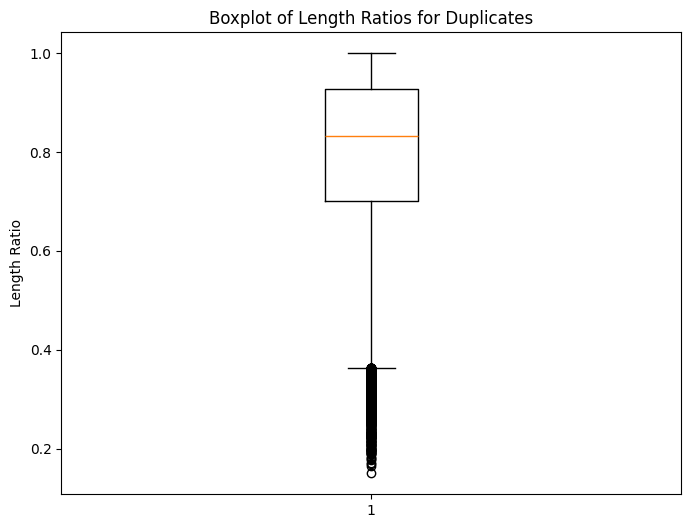

In [56]:
plt.figure(figsize=(8,6))
plt.boxplot(same_question['length_ratio'])
plt.title('Boxplot of Length Ratios for Duplicates')
plt.ylabel('Length Ratio')
plt.show()


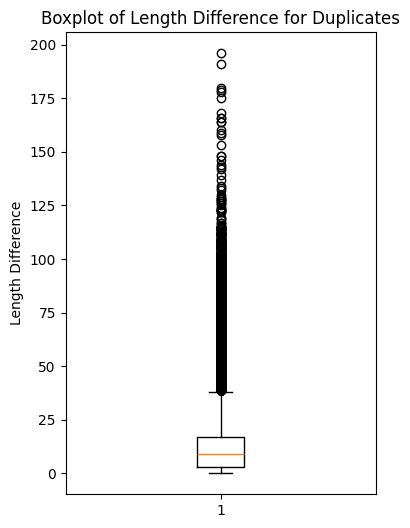

In [82]:
plt.figure(figsize=(4,6))
plt.boxplot(same_question['length_diff'])
plt.title('Boxplot of Length Difference for Duplicates')
plt.ylabel('Length Difference')
plt.show()

In [62]:
diff_question = diff_question.copy()
# Calculate lengths of question1 and question2 for each row
diff_question['q1_length'] = diff_question['question1'].str.len()
diff_question['q2_length'] = diff_question['question2'].str.len()

# Calculate the ratio (min length / max length)
diff_question['length_ratio'] = diff_question.apply(lambda row: min(row.loc['q1_length'], row.loc['q2_length']) / max(row.loc['q1_length'], row.loc['q2_length']), axis=1)
diff_question['length_diff'] = diff_question.apply(lambda row: max(row.loc['q1_length'], row.loc['q2_length']) - min(row.loc['q1_length'], row.loc['q2_length']), axis=1)


In [63]:
diff_question['length_ratio'].describe()

count    255024.000000
mean          0.726548
std           0.199854
min           0.006711
25%           0.588235
50%           0.759036
75%           0.896341
max           1.000000
Name: length_ratio, dtype: float64

In [64]:
diff_question['length_diff'].describe()

count    255024.000000
mean         24.263842
std          29.511226
min           0.000000
25%           5.000000
50%          14.000000
75%          32.000000
max        1080.000000
Name: length_diff, dtype: float64

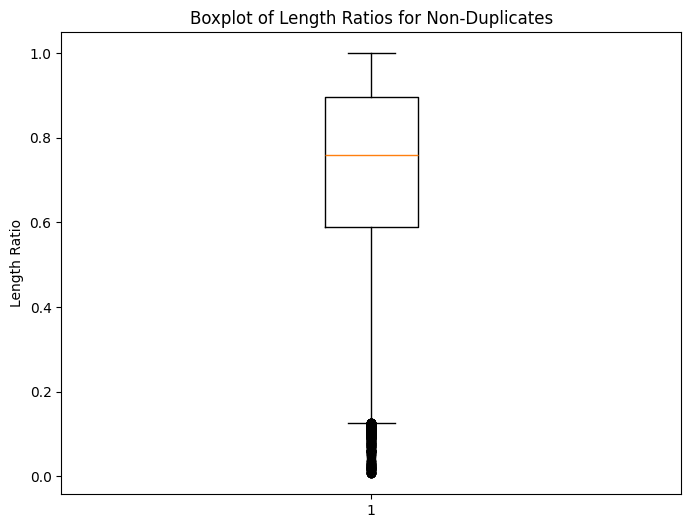

In [65]:
plt.figure(figsize=(8,6))
plt.boxplot(diff_question['length_ratio'])
plt.title('Boxplot of Length Ratios for Non-Duplicates')
plt.ylabel('Length Ratio')
plt.show()

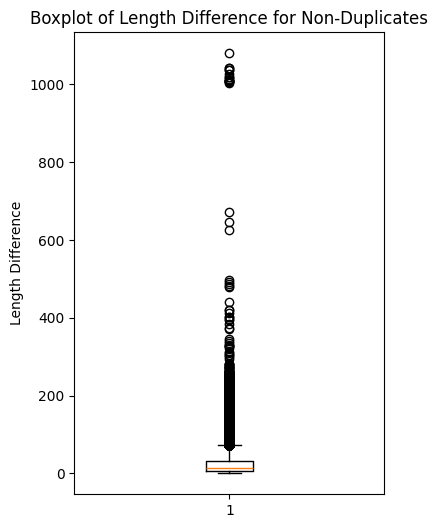

In [81]:
plt.figure(figsize=(4,6))
plt.boxplot(diff_question['length_diff'])
plt.title('Boxplot of Length Difference for Non-Duplicates')
plt.ylabel('Length Difference')
plt.show()

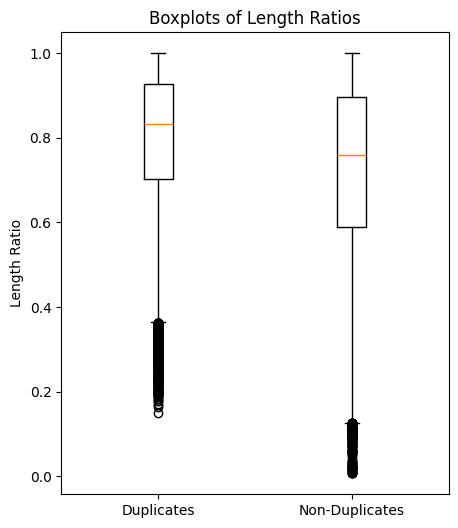

In [78]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Plot both boxplots on the same axis
ax.boxplot([same_question['length_ratio'], diff_question['length_ratio']])
ax.set_xticklabels(['Duplicates', 'Non-Duplicates'])  # Set x-axis tick labels
ax.set_title('Boxplots of Length Ratios')
ax.set_ylabel('Length Ratio')

# Show the plot
plt.show()

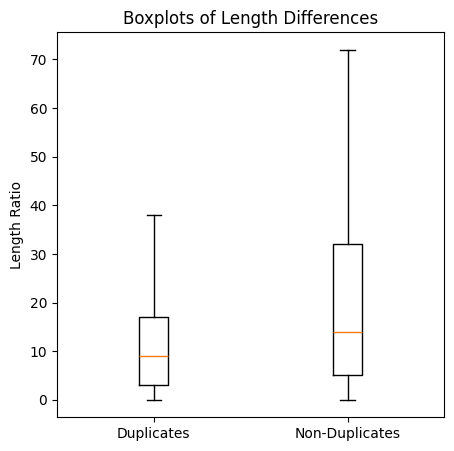

In [83]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Plot both boxplots on the same axis
ax.boxplot([same_question['length_diff'], diff_question['length_diff']], showfliers=False)
ax.set_xticklabels(['Duplicates', 'Non-Duplicates'])  # Set x-axis tick labels
ax.set_title('Boxplots of Length Differences')
ax.set_ylabel('Length Ratio')

# Show the plot
plt.show()

In [93]:
qid_same = pd.Series(same_question['question1'].tolist() + same_question['question2'].tolist())


In [94]:
qid_diff = pd.Series(diff_question['question1'].tolist() + diff_question['question2'].tolist())

In [95]:
qid_diff = qid_diff.copy()
# Calculate lengths of question1 and question2 for each row
same_lengths = qid_same.str.len()
diff_lengths = qid_diff.str.len()

In [98]:
same_lengths.describe()

count    298526.000000
mean         52.890140
std          23.293664
min           2.000000
25%          37.000000
50%          47.000000
75%          62.000000
max         430.000000
dtype: float64

In [99]:
diff_lengths.describe()

count    510048.000000
mean         63.880341
std          35.460905
min           1.000000
25%          40.000000
50%          54.000000
75%          78.000000
max        1169.000000
dtype: float64

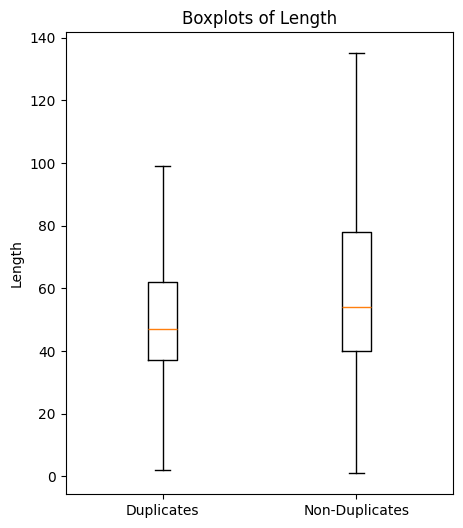

In [97]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 6))

# Plot both boxplots on the same axis
ax.boxplot([same_lengths, diff_lengths], showfliers=False)
ax.set_xticklabels(['Duplicates', 'Non-Duplicates'])  # Set x-axis tick labels
ax.set_title('Boxplots of Length')
ax.set_ylabel('Length')

# Show the plot
plt.show()

In [101]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------  297.0/301.4 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.4 MB/s eta 0:00:00


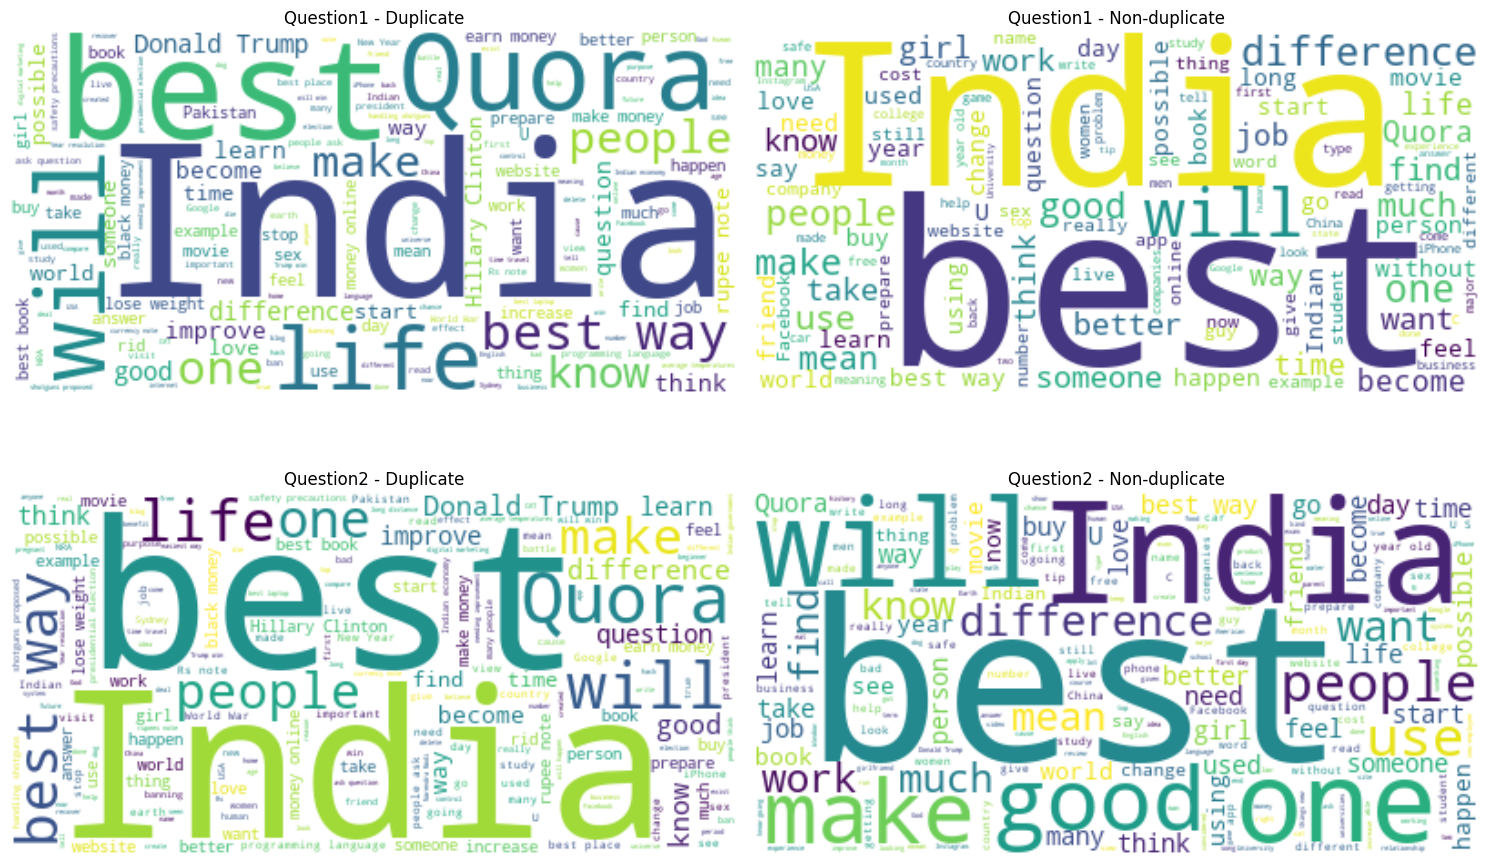

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and plot word clouds
def generate_wordcloud(data_q1_duplicate, data_q1_non_duplicate, data_q2_duplicate, data_q2_non_duplicate):
    # Generate word clouds for question1 and question2
    wordcloud_q1_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_duplicate.astype(str)))
    wordcloud_q1_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_non_duplicate.astype(str)))
    wordcloud_q2_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_duplicate.astype(str)))
    wordcloud_q2_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_non_duplicate.astype(str)))

    # Plot the Word Clouds in a 2x2 subplot
    plt.figure(figsize=(15, 10))

    # Plot for question1 and is_duplicate = 1
    plt.subplot(2, 2, 1)
    plt.imshow(wordcloud_q1_duplicate, interpolation='bilinear')
    plt.title('Question1 - Duplicate')
    plt.axis('off')

    # Plot for question1 and is_duplicate = 0
    plt.subplot(2, 2, 2)
    plt.imshow(wordcloud_q1_non_duplicate, interpolation='bilinear')
    plt.title('Question1 - Non-duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 1
    plt.subplot(2, 2, 3)
    plt.imshow(wordcloud_q2_duplicate, interpolation='bilinear')
    plt.title('Question2 - Duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 0
    plt.subplot(2, 2, 4)
    plt.imshow(wordcloud_q2_non_duplicate, interpolation='bilinear')
    plt.title('Question2 - Non-duplicate')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Separate data for duplicate and non-duplicate questions
duplicate_data_q1 = train_data[train_data['is_duplicate'] == 1]['question1']
non_duplicate_data_q1 = train_data[train_data['is_duplicate'] == 0]['question1']
duplicate_data_q2 = train_data[train_data['is_duplicate'] == 1]['question2']
non_duplicate_data_q2 = train_data[train_data['is_duplicate'] == 0]['question2']

# Generate and plot word clouds for 'question1' and 'question2'
generate_wordcloud(duplicate_data_q1, non_duplicate_data_q1, duplicate_data_q2, non_duplicate_data_q2)

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_q1 = vectorizer.fit_transform(train_data['question1'])

# Get feature names (bigrams)
feature_names = vectorizer.get_feature_names_out()

top_bigrams = pd.DataFrame(bigrams_q1.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q1 = top_bigrams.sort_values(by='Count', ascending=False).head(20)
bigrams_q2 = vectorizer.fit_transform(train_data['question2'])
feature_names = vectorizer.get_feature_names_out()
top_bigrams = pd.DataFrame(bigrams_q2.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q2 = top_bigrams.sort_values(by='Count', ascending=False).head(20)

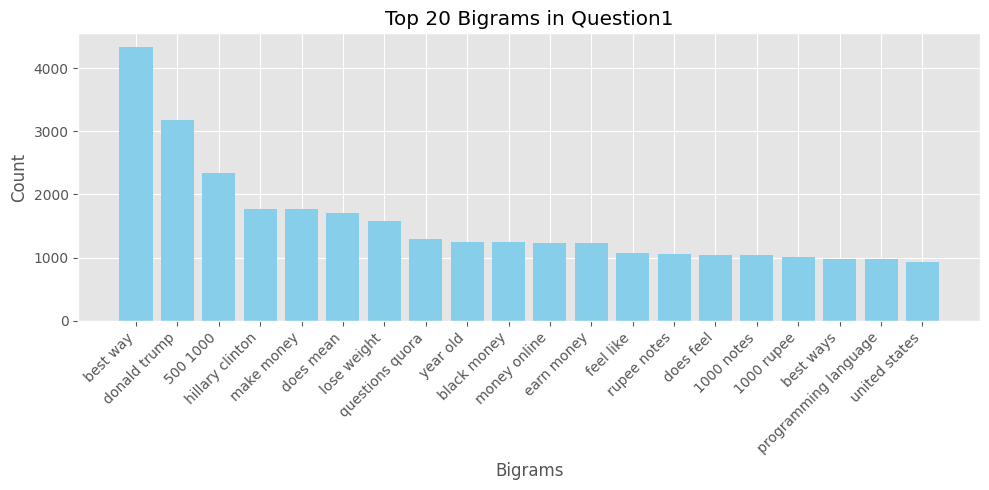

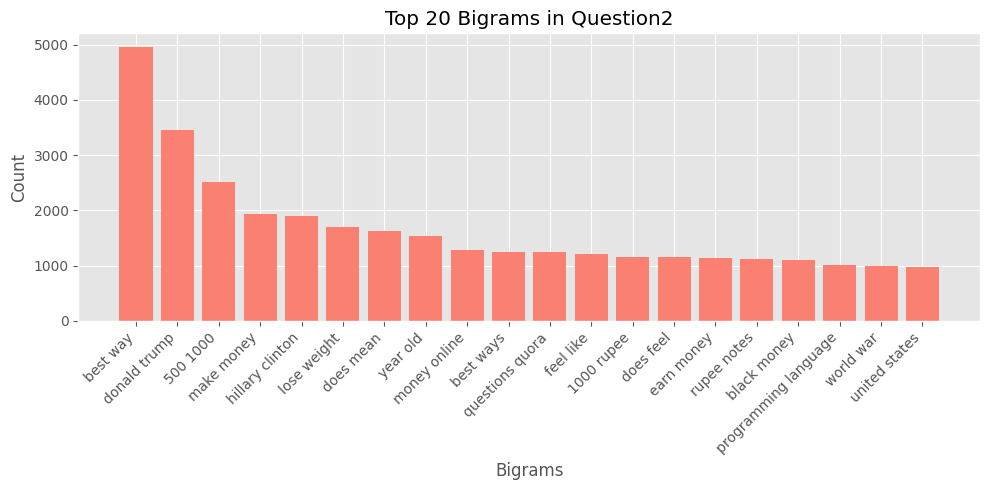

In [107]:
# Set the style for the plots
plt.style.use('ggplot')

# Plot histograms for top bigrams in question1
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q1.index, top_bigrams_q1['Count'], color='skyblue')
plt.title('Top 20 Bigrams in Question1')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot histograms for top bigrams in question2
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q2.index, top_bigrams_q2['Count'], color='salmon')
plt.title('Top 20 Bigrams in Question2')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()